In [11]:
import pandas as pd
#crimeData = pd.read_json('https://data.cityofnewyork.us/resource/5jvd-shfj.json')
crimeData = pd.read_csv('C:\JupyterNotebooks\PyCon2018_GISTutorial-master\Data\Crime_Map_.csv')

In [12]:
crimeData.head(1).T

,0
CMPLNT_NUM,846207268
CMPLNT_FR_DT,12/31/2017
CMPLNT_FR_TM,12:30:00
CMPLNT_TO_DT,12/31/2017
CMPLNT_TO_TM,12:35:00
RPT_DT,12/31/2017
KY_CD,344
OFNS_DESC,ASSAULT 3 & RELATED OFFENSES
PD_CD,113
PD_DESC,"MENACING,UNCLASSIFIED"


In [13]:
crimeData.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,Latitude,Longitude
count,4.587520e+05,458752.000000,458462.000000,458752.000000,458752.000000,458752.000000
mean,5.497236e+08,303.805703,410.917217,62.922625,40.736461,-73.925610
std,2.598119e+08,153.428567,218.011776,34.459669,0.083714,0.077101
min,1.000029e+08,101.000000,101.000000,1.000000,40.498768,-74.253191
25%,3.245971e+08,118.000000,258.000000,40.000000,40.673165,-73.973017
50%,5.502848e+08,341.000000,349.000000,62.000000,40.734574,-73.927314
75%,7.738210e+08,351.000000,638.000000,90.000000,40.812783,-73.883401
max,9.999973e+08,678.000000,922.000000,123.000000,40.912723,-73.700717


In [14]:
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458752 entries, 0 to 458751
Data columns (total 24 columns):
CMPLNT_NUM           458752 non-null int64
CMPLNT_FR_DT         458752 non-null object
CMPLNT_FR_TM         458752 non-null object
CMPLNT_TO_DT         387399 non-null object
CMPLNT_TO_TM         387595 non-null object
RPT_DT               458752 non-null object
KY_CD                458752 non-null int64
OFNS_DESC            458730 non-null object
PD_CD                458462 non-null float64
PD_DESC              458462 non-null object
CRM_ATPT_CPTD_CD     458752 non-null object
LAW_CAT_CD           458752 non-null object
JURIS_DESC           458752 non-null object
BORO_NM              458752 non-null object
ADDR_PCT_CD          458752 non-null int64
LOC_OF_OCCUR_DESC    369834 non-null object
PREM_TYP_DESC        456967 non-null object
PARKS_NM             3976 non-null object
HADEVELOPT           23626 non-null object
X_COORD_CD           458752 non-null object
Y_COORD_CD    

In [15]:
crimeData.T.apply(lambda x: x.nunique(), axis=1).sort_values()

CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
JURIS_DESC               18
OFNS_DESC                61
KY_CD                    66
PREM_TYP_DESC            70
ADDR_PCT_CD              77
HADEVELOPT              263
PD_DESC                 331
PD_CD                   341
RPT_DT                  365
PARKS_NM                636
CMPLNT_TO_DT            984
CMPLNT_FR_TM           1440
CMPLNT_TO_TM           1440
CMPLNT_FR_DT           1676
X_COORD_CD            48878
Y_COORD_CD            51895
Latitude              70267
Longitude             70270
Lat_Lon               70274
CMPLNT_NUM           458752
dtype: int64

In [16]:
getLookupTbl = crimeData[['OFNS_DESC', 'KY_CD']].drop_duplicates().dropna().reset_index()
getCrimeCounts = crimeData['OFNS_DESC'].value_counts()

In [17]:
train = pd.read_json(r"C:\JupyterNotebooks\Two Sigma\train.json")
train.head()
train.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


In [18]:
train.shape

(49352, 15)

In [19]:
train.loc[train['longitude']==0, ['latitude', 'longitude']]
train = train.loc[(train!=0.0).all(axis=1)]
train.loc[train['latitude']==0, ['latitude', 'longitude']]

print(train.longitude.min())
print(train.latitude.min())

train = train.loc[(train!=34.0126).all(axis=1)]
train.loc[train['latitude']==34.0126, ['latitude', 'longitude']]

train = train.loc[train['latitude']<44]

train.rename(columns={'longitude': 'Longitude', 'latitude': 'Latitude'}, inplace=True)
#print(train.head())


topOfns = crimeData.groupby('OFNS_DESC').filter(lambda g: len(g) > 10000).groupby('OFNS_DESC').size().sort_values(ascending=False).to_frame().reset_index()
crimeData = pd.merge(crimeData, topOfns, on='OFNS_DESC')
crimeData.head()

-118.271
34.0126


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,0
0,846207268,12/31/2017,12:30:00,12/31/2017,12:35:00,12/31/2017,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,FRONT OF,STREET,NaN,NaN,"980,825","176,742",40.651800,-74.012345,"(40.651800177, -74.01234462)",51339
1,395931064,12/30/2017,13:00:00,12/30/2017,13:15:00,12/30/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,"1,055,866","195,134",40.701993,-73.741714,"(40.701992943, -73.741713632)",51339
2,364766951,12/30/2017,12:10:00,12/30/2017,12:15:00,12/30/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,"1,017,904","212,282",40.749286,-73.878540,"(40.749285799, -73.878540057)",51339
3,291921168,12/30/2017,12:10:00,12/30/2017,12:30:00,12/30/2017,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,FRONT OF,STREET,NaN,NaN,"999,060","167,196",40.625587,-73.946649,"(40.625586727, -73.946649424)",51339
4,700404194,12/30/2017,12:10:00,12/30/2017,12:30:00,12/30/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,FRONT OF,STREET,NaN,NaN,"999,463","166,366",40.623308,-73.945200,"(40.623307868, -73.945199514)",51339


In [20]:
print(crimeData.dtypes)
print(train.dtypes)

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD            int64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD            object
Y_COORD_CD            object
Latitude             float64
Longitude            float64
Lat_Lon               object
0                      int64
dtype: object
bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
Latitude           float64
listing_id        

In [21]:
crimeData.X_COORD_CD = crimeData['X_COORD_CD'].str.replace(',', '').astype(int)
crimeData.Y_COORD_CD = crimeData['Y_COORD_CD'].str.replace(',', '').astype(int)

crimeData.Latitude = crimeData.Latitude.round(4)
crimeData.Longitude = crimeData.Longitude.round(4)
train.Latitude = train.Latitude.round(4)
train.Longitude = train.Longitude.round(4)

crimeData = crimeData[['Latitude', 'Longitude', 'OFNS_DESC']]
train = train[['Latitude', 'Longitude', 'interest_level']]

finalDataset = pd.merge(crimeData, train,  how='inner', on=['Latitude','Longitude'])
finalDataset.head()

,Latitude,Longitude,OFNS_DESC,interest_level
0,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
1,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
2,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
3,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
4,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low


In [23]:
#print(finalDataset.head())
print(finalDataset.memory_usage())
print(finalDataset.memory_usage(index=True).sum())
print(finalDataset.shape)

Index             24720
Latitude          24720
Longitude         24720
OFNS_DESC         24720
interest_level    24720
dtype: int64
123600
(3090, 4)


In [24]:
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [25]:
finalDataset.head()

,Latitude,Longitude,OFNS_DESC,interest_level
0,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
1,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
2,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
3,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low
4,40.7793,-73.9492,ASSAULT 3 & RELATED OFFENSES,low


In [26]:
print(finalDataset.dtypes)


Latitude          float64
Longitude         float64
OFNS_DESC          object
interest_level     object
dtype: object


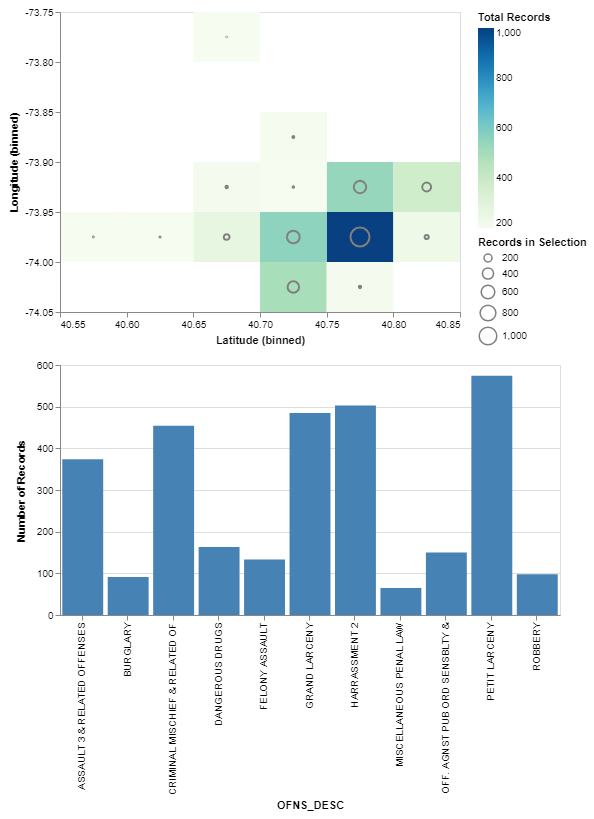

In [28]:
pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(finalDataset).mark_rect().encode(
    alt.X('Latitude:Q', bin=True),
    alt.Y('Longitude:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
)

#import pprint
#pprint.pprint(rect.to_dict())

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(finalDataset).mark_bar().encode(
    x='OFNS_DESC:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    selection=pts,
    width=500,
    height=250
)

alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)